In [1]:
import datacube


In [2]:
dc = datacube.Datacube()
ds = dc.find_datasets(product= "c2l2tony")

Failed to resolve driver datacube.plugins.index::s3aio_index
Error was: ContextualVersionConflict(botocore 1.13.26 (/usr/local/lib/python3.6/dist-packages), Requirement.parse('botocore<1.13.0,>=1.12.117'), {'boto3'})


In [3]:
len(ds)

23

In [9]:
EPSG='32631'

lon_min,lon_max,lat_min,lat_max = [4.5,4.53,5.4,5.43]

meas=['coastal_aerosol', 
    'blue',                              
    'green',                            
    'red',                                
    'nir',                              
    'swir_1',                             
    'swir_2',                             
    'quality_l2_aerosol']  
ds2 = dc.load(product="c2l2tony", datasets=ds, 
                measurements=meas, 
                output_crs='epsg:' + EPSG,
                resolution=(-30, 30),
                x=(lon_min, lon_max),
                y=(lat_min, lat_max)
              
             )

In [10]:
ds2

<xarray.Dataset>
Dimensions:             (time: 23, x: 112, y: 112)
Coordinates:
  * time                (time) datetime64[ns] 2018-01-07T09:57:16.216282 ... 2018-12-25T09:57:02.122880
  * y                   (y) float64 6.004e+05 6.004e+05 ... 5.971e+05 5.971e+05
  * x                   (x) float64 6.662e+05 6.662e+05 ... 6.695e+05 6.695e+05
Data variables:
    coastal_aerosol     (time, y, x) uint16 9225 9237 9198 ... 8669 8681 8701
    blue                (time, y, x) uint16 9782 9790 9788 ... 9277 9277 9280
    green               (time, y, x) uint16 10291 10308 10298 ... 9906 9893 9895
    red                 (time, y, x) uint16 10094 10099 10095 ... 9631 9642 9628
    nir                 (time, y, x) uint16 9794 9804 9786 ... 9371 9363 9369
    swir_1              (time, y, x) uint16 9142 9119 9132 ... 8849 8831 8863
    swir_2              (time, y, x) uint16 8688 8698 8692 ... 8448 8440 8456
    quality_l2_aerosol  (time, y, x) uint8 196 196 196 196 ... 196 196 196 196
Attribut

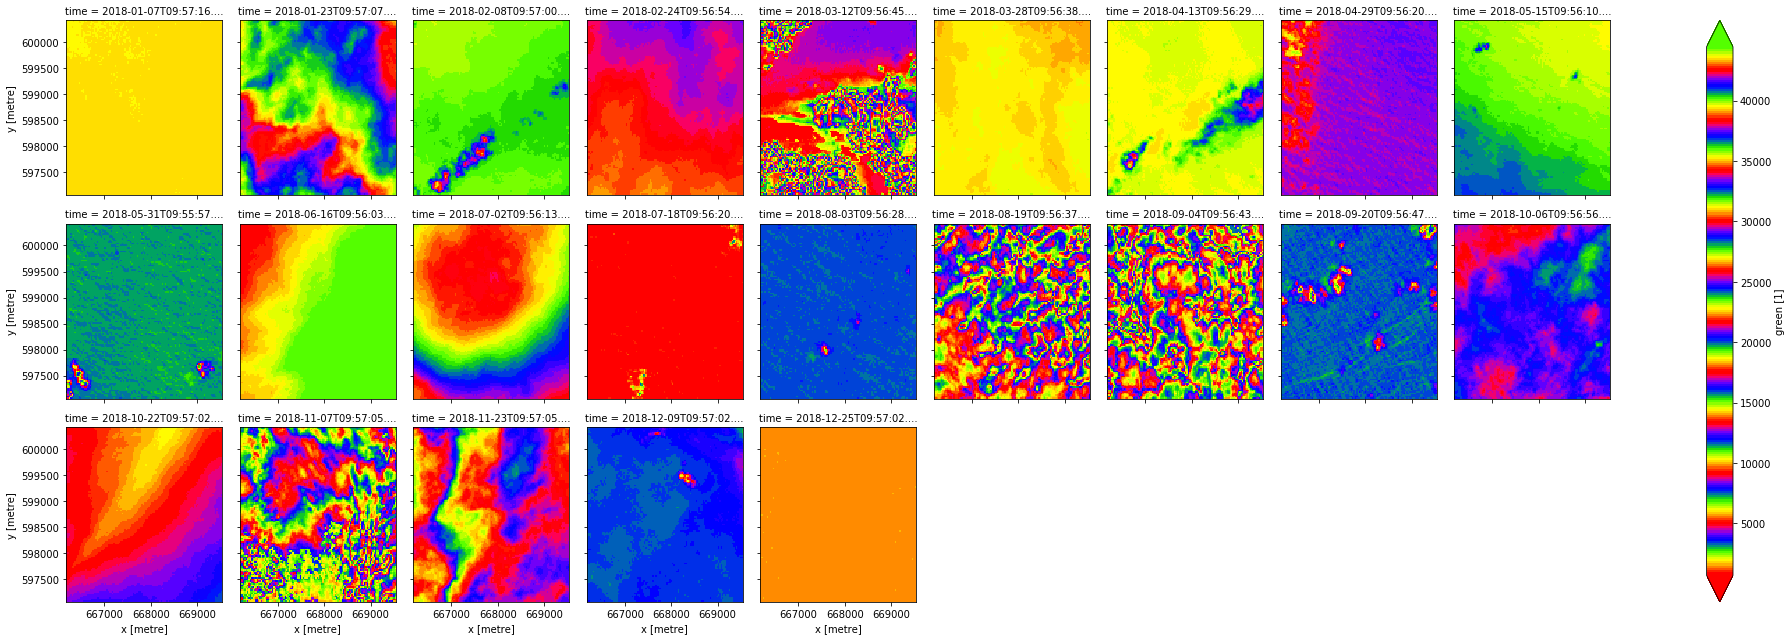

In [11]:
%matplotlib inline
display_color = 'green'
# 
ds2[display_color].plot.imshow('x', 'y', col='time', col_wrap=9, robust=True, cmap="prism")

In [7]:
! aws s3 ls ga-africa-provisional/nigeria-2018-08-21/collection2/level2/standard/oli-tirs/2018/190/056/LC08_L2SP_190056_20180107_20190821_02_T1/LC08_L2SP_190056_20180107_20190821_02_T1_SR_B1.TIF

2019-08-30 00:46:25  116973498 LC08_L2SP_190056_20180107_20190821_02_T1_SR_B1.TIF


In [8]:
! gdalinfo /vsis3/ga-africa-provisional/nigeria-2018-08-21/collection2/level2/standard/oli-tirs/2018/190/056/LC08_L2SP_190056_20180107_20190821_02_T1/LC08_L2SP_190056_20180107_20190821_02_T1_SR_B1.TIF

Driver: GTiff/GeoTIFF
Files: /vsis3/ga-africa-provisional/nigeria-2018-08-21/collection2/level2/standard/oli-tirs/2018/190/056/LC08_L2SP_190056_20180107_20190821_02_T1/LC08_L2SP_190056_20180107_20190821_02_T1_SR_B1.TIF
Size is 7571, 7721
Coordinate System is:
PROJCS["WGS 84 / UTM zone 31N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",3],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    A